# ML Assignmnt 05: Ensemble Learning

Juee S (PD_49) PRN: 1032222572

Dataset: Kaggle Brain Tumor Prediction Dataset

This dataset contains information on the MRI scans of patients suspected to have brain tumors. Information ranges from personal information like age to type of treatment received, presence of chronic illness, blood pressure, etc.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "./Brain_Tumor_Prediction_Dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,...,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Treatment_Received,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,...,Yes,122/88,No,Malignant,NaN,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,...,No,126/119,No,Malignant,NaN,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,...,No,118/65,No,Benign,Chemotherapy,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,...,No,165/119,Yes,Benign,Radiation,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,...,Yes,156/97,Yes,Malignant,NaN,17,Moderate,No,Moderate,No


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Display dataset info
print(df.info())

# Summary statistics
print(df.describe())

Age                        0
Gender                     0
Country                    0
Tumor_Size                 0
Tumor_Location             0
MRI_Findings               0
Genetic_Risk               0
Smoking_History            0
Alcohol_Consumption        0
Radiation_Exposure         0
Head_Injury_History        0
Chronic_Illness            0
Blood_Pressure             0
Diabetes                   0
Tumor_Type                 0
Treatment_Received     62748
Survival_Rate(%)           0
Tumor_Growth_Rate          0
Family_History             0
Symptom_Severity           0
Brain_Tumor_Present        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_S

In [ ]:
# Drop the "Treatment_Received" column
df = df.drop(columns=["Treatment_Received"], errors='ignore')

# Verify the changes
df.head()

,Age,Gender,Country,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,Head_Injury_History,Chronic_Illness,Blood_Pressure,Diabetes,Tumor_Type,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,Other,China,8.70,Cerebellum,Severe,81,No,Yes,Medium,No,Yes,122/88,No,Malignant,58,Slow,Yes,Mild,No
1,87,Female,Australia,8.14,Temporal,Normal,65,No,Yes,Medium,No,No,126/119,No,Malignant,13,Rapid,Yes,Severe,No
2,41,Male,Canada,6.02,Occipital,Severe,100,Yes,No,Low,Yes,No,118/65,No,Benign,67,Slow,Yes,Moderate,Yes
3,52,Male,Japan,7.26,Occipital,Normal,19,Yes,Yes,High,Yes,No,165/119,Yes,Benign,85,Moderate,No,Moderate,Yes
4,84,Female,Brazil,7.94,Temporal,Abnormal,47,No,Yes,Medium,No,Yes,156/97,Yes,Malignant,17,Moderate,No,Moderate,No


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Display dataset info
print(df.info())

# Summary statistics
print(df.describe())

Age                    0
Gender                 0
Country                0
Tumor_Size             0
Tumor_Location         0
MRI_Findings           0
Genetic_Risk           0
Smoking_History        0
Alcohol_Consumption    0
Radiation_Exposure     0
Head_Injury_History    0
Chronic_Illness        0
Blood_Pressure         0
Diabetes               0
Tumor_Type             0
Survival_Rate(%)       0
Tumor_Growth_Rate      0
Family_History         0
Symptom_Severity       0
Brain_Tumor_Present    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Age                  250000 non-null  int64  
 1   Gender               250000 non-null  object 
 2   Country              250000 non-null  object 
 3   Tumor_Size           250000 non-null  float64
 4   Tumor_Location       250000 non-null  object 
 5   MRI_Findings  

In [ ]:
df.drop(columns=["Country", "Blood_Pressure"], inplace=True)

binary_features = ["Smoking_History", "Alcohol_Consumption",
                   "Head_Injury_History", "Chronic_Illness", "Diabetes", "Family_History", "Brain_Tumor_Present"]

for col in binary_features:
    df[col] = df[col].map({"No": 0, "Yes": 1})

from sklearn.preprocessing import LabelEncoder

categorical_features = ["Gender", "Tumor_Location", "MRI_Findings", "Tumor_Type","Radiation_Exposure",
                        "Tumor_Growth_Rate", "Symptom_Severity"]

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()

,Age,Gender,Tumor_Size,Tumor_Location,MRI_Findings,Genetic_Risk,Smoking_History,Alcohol_Consumption,Radiation_Exposure,Head_Injury_History,Chronic_Illness,Diabetes,Tumor_Type,Survival_Rate(%),Tumor_Growth_Rate,Family_History,Symptom_Severity,Brain_Tumor_Present
0,66,2,8.70,0,2,81,0,1,2,0,1,0,1,58,2,1,0,0
1,87,0,8.14,4,1,65,0,1,2,0,0,0,1,13,1,1,2,0
2,41,1,6.02,2,2,100,1,0,1,1,0,0,0,67,2,1,1,1
3,52,1,7.26,2,1,19,1,1,0,1,0,1,0,85,0,0,1,1
4,84,0,7.94,4,0,47,0,1,2,0,1,1,1,17,0,0,1,0


In [ ]:
print(df.isnull().sum())  # Count missing values in target

Age                    0
Gender                 0
Tumor_Size             0
Tumor_Location         0
MRI_Findings           0
Genetic_Risk           0
Smoking_History        0
Alcohol_Consumption    0
Radiation_Exposure     0
Head_Injury_History    0
Chronic_Illness        0
Diabetes               0
Tumor_Type             0
Survival_Rate(%)       0
Tumor_Growth_Rate      0
Family_History         0
Symptom_Severity       0
Brain_Tumor_Present    0
dtype: int64


In [ ]:
df = df.dropna(subset=["Brain_Tumor_Present"])  # Remove rows where target is NaN

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Brain_Tumor_Present"])
y = df["Brain_Tumor_Present"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show dataset shape
print("\nTrain-Test Split:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")



Train-Test Split:
X_train: (200000, 17), X_test: (50000, 17)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=7)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 0.5018

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.57      0.53     25029
           1       0.50      0.43      0.47     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Dictionary to store model accuracies
model_accuracies = {}

# Function to train and evaluate models
def train_and_evaluate(model, model_name):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy

    print(f"\n{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
train_and_evaluate(knn, "KNN")

# Support Vector Machine (SVM)
svm = SVC(kernel='linear')
train_and_evaluate(svm, "SVM")

# Decision Tree (DT)
dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt, "Decision Tree")

# Random Forest Classifier (RFC)
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate(rfc, "Random Forest")

# Compare model accuracies
print("\nModel Accuracy Comparison:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")



KNN Accuracy: 0.5013
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     25029
           1       0.50      0.50      0.50     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



In [ ]:
# Decision Tree (DT)
dt = DecisionTreeClassifier(random_state=42)
train_and_evaluate(dt, "Decision Tree")


Decision Tree Accuracy: 0.4989
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     25029
           1       0.50      0.50      0.50     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, max_depth=7)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [ ]:
# Compare model accuracies
print("\nModel Accuracy Comparison:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest: {accuracy:.4f}")


Model Accuracy Comparison:
KNN: 0.5013
Decision Tree: 0.4989
Random Forest: 0.5018


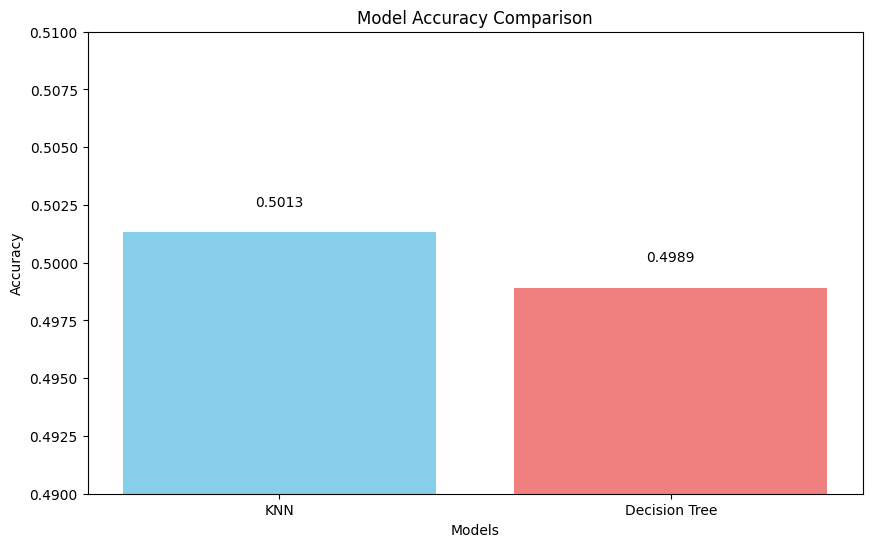

In [ ]:

import matplotlib.pyplot as plt

# Extract model names and accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')  # Adjust 0.001 for better positioning

plt.ylim(0.49, 0.51)  # Set y-axis limit for better visualization

plt.show()



AdaBoost Accuracy: 0.4985

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     25029
           1       0.50      0.46      0.48     24971

    accuracy                           0.50     50000
   macro avg       0.50      0.50      0.50     50000
weighted avg       0.50      0.50      0.50     50000



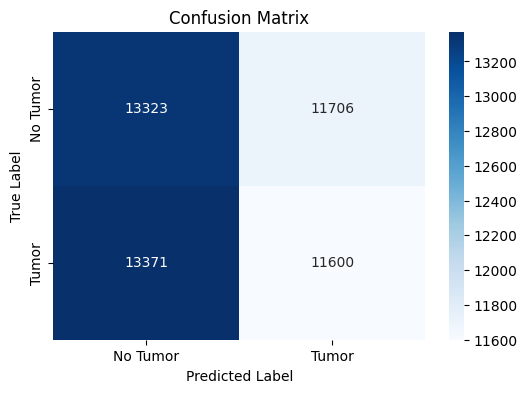

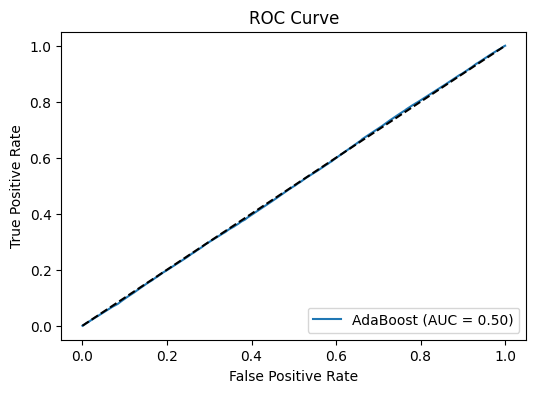

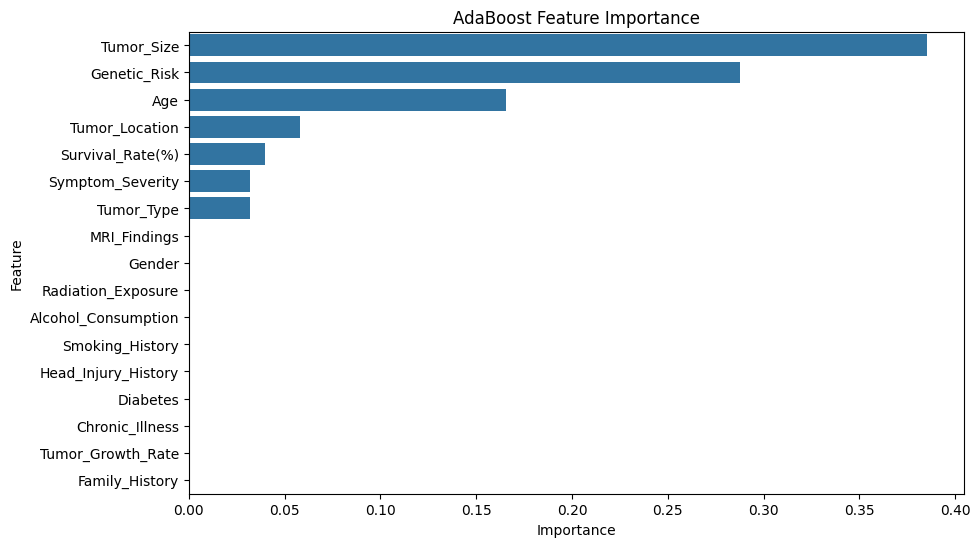

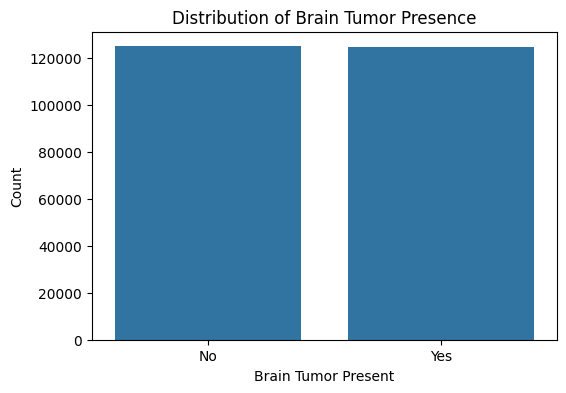

In [ ]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns

# Load the dataset
file_path = "./Brain_Tumor_Prediction_Dataset.csv"
df = pd.read_csv(file_path)

# ... (rest of your data preprocessing code as provided) ...

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train AdaBoost model with DecisionTreeClassifier as base estimator
ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Predictions
y_pred = ada_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAdaBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Tumor', 'Tumor'], yticklabels=['No Tumor', 'Tumor'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
y_probs = ada_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AdaBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
feature_importances = ada_model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('AdaBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Brain_Tumor_Present', data=df)
plt.title('Distribution of Brain Tumor Presence')
plt.xlabel('Brain Tumor Present')
plt.ylabel('Count')
plt.show()

Bagging Accuracy: 0.5034
Stacking Accuracy: 0.4998
Gradient Boosting Accuracy: 0.4984

Model Accuracy Comparison:
Bagging: 0.5034
Stacking: 0.4998
Gradient Boosting: 0.4984


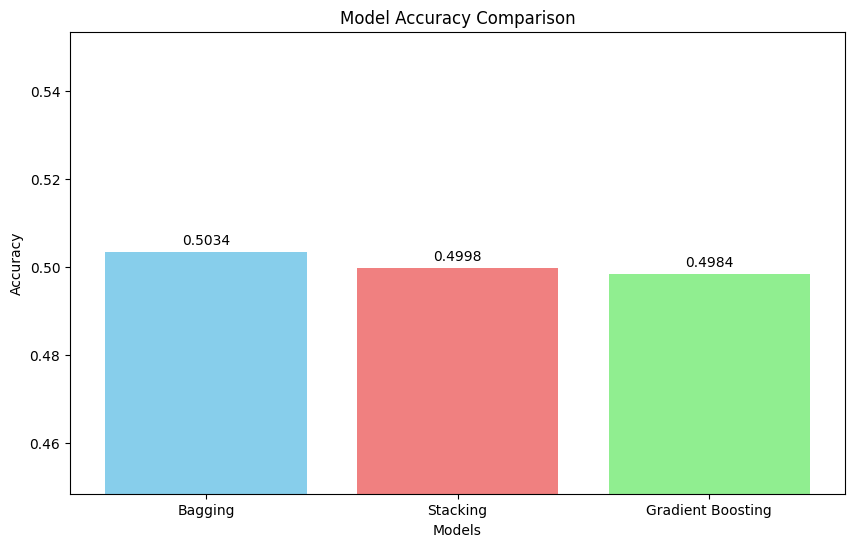

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Dictionary to store model accuracies
model_accuracies = {}

def train_and_evaluate(model, model_name):
    # Assuming X_train, X_test, y_train, y_test are already defined
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Bagging
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
train_and_evaluate(bagging_model, "Bagging")

# Stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
train_and_evaluate(stacking_model, "Stacking")

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
train_and_evaluate(gb_model, "Gradient Boosting")

# Compare model accuracies
print("\nModel Accuracy Comparison:")
for model, acc in model_accuracies.items():
    print(f"{model}: {acc:.4f}")

# Extract model names and accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")

# Add accuracy values on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center', va='bottom')  # Adjust 0.001 for better positioning

plt.ylim(min(accuracies) - 0.05, max(accuracies) + 0.05)  # Dynamic y-axis limit

plt.show()